In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuscitk.neuscitk as ntk

In [2]:
dataset = ntk.LabChartDataset('assets/datasets/test_1ch.mat')

In [3]:
block = dataset.get_block(3)

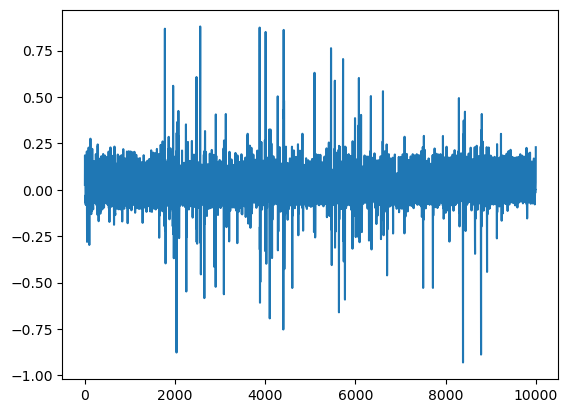

In [20]:
filter = ntk.Filter(1000, highcut=300)
filtered_block = filter.apply(block)


# plt.plot(block[0, 10000:20000])
plt.plot(filtered_block[0, 10000:20000])

In [16]:
w, h = filter.frequency_response

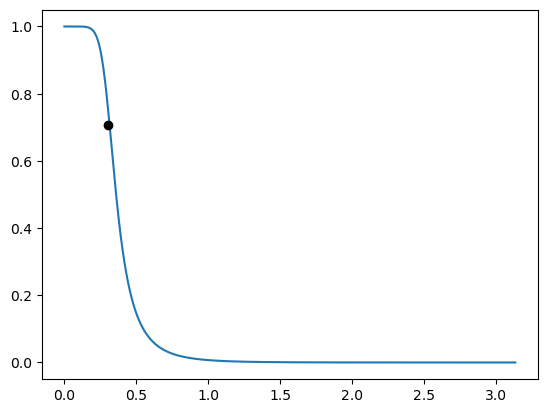

In [21]:
plt.plot(w, abs(h))
plt.plot(0.3, 0.5*np.sqrt(2), 'ko')